In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('results.csv')
pd.set_option('display.max_columns', None)

In [3]:
df = raw_data.copy()

In [4]:
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,CAN,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,KEN,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,ETH,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,AUS,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,JPN,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [6]:
df2 = df.drop(['name', 'ctz', 'city', 'state', 'genderdiv', 'bib', 'country'], axis=1)

In [7]:
for item in ['25k', '10k', 'half', '30k', '5k', '20k', '35k', '40k']:
    df2[item] = df[item].apply(lambda s: s.replace('-', ''))

In [8]:
for item in ['25k', '10k', 'half', '30k', '5k', '20k', '35k', '40k']:
    df2[item] = df[item].apply(lambda s: s.replace('-', ''))

In [9]:
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

In [10]:
coerce_df_columns_to_numeric(df2, ['25k', '10k', 'half', '30k', '5k', '20k', '35k', '40k'])

In [15]:
df2['male'] = pd.get_dummies(df['gender'], drop_first=True)
df2.drop('gender', axis=1, inplace=True)

In [31]:
df3 = df2.dropna(axis=0)

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16054 entries, 0 to 16163
Data columns (total 14 columns):
25k         16054 non-null float64
age         16054 non-null int64
division    16054 non-null int64
10k         16054 non-null float64
half        16054 non-null float64
official    16054 non-null float64
overall     16054 non-null int64
pace        16054 non-null float64
30k         16054 non-null float64
5k          16054 non-null float64
20k         16054 non-null float64
35k         16054 non-null float64
40k         16054 non-null float64
male        16054 non-null uint8
dtypes: float64(10), int64(3), uint8(1)
memory usage: 1.7 MB


In [32]:
def dist_plots(col):
    plt.figure(figsize=(15,5))

    plt.subplot(1, 2, 1)
    sns.distplot(df3[col])
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df3[col])
    plt.tight_layout()

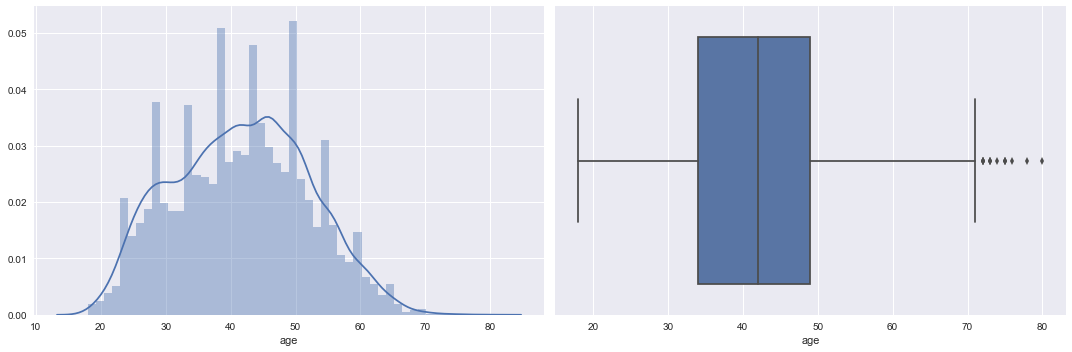

In [37]:
dist_plots('age')

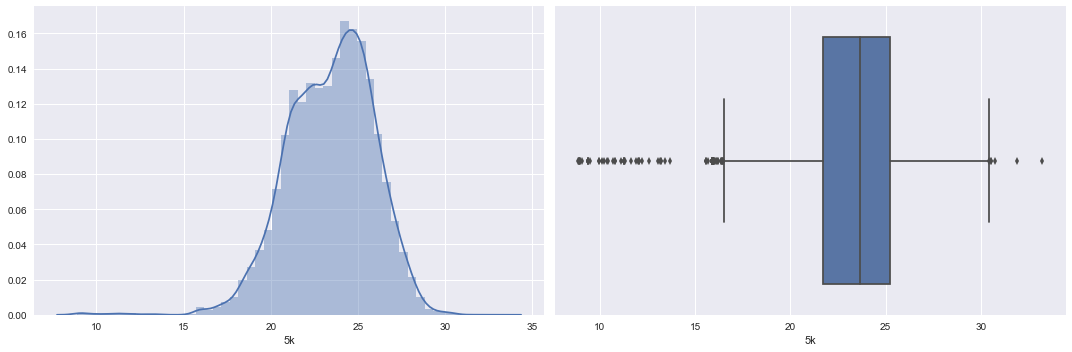

In [38]:
dist_plots('5k')

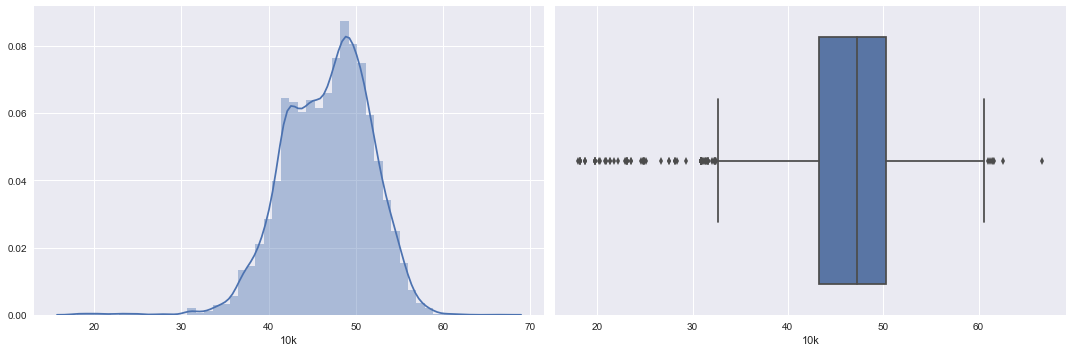

In [39]:
dist_plots('10k')

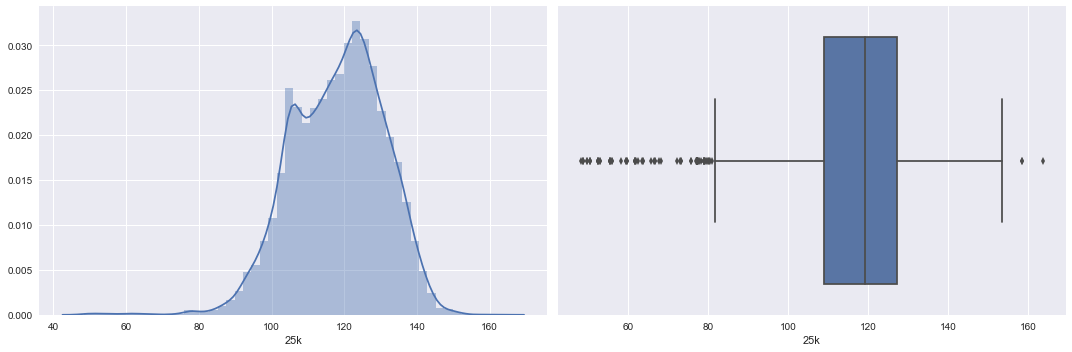

In [40]:
dist_plots('25k')

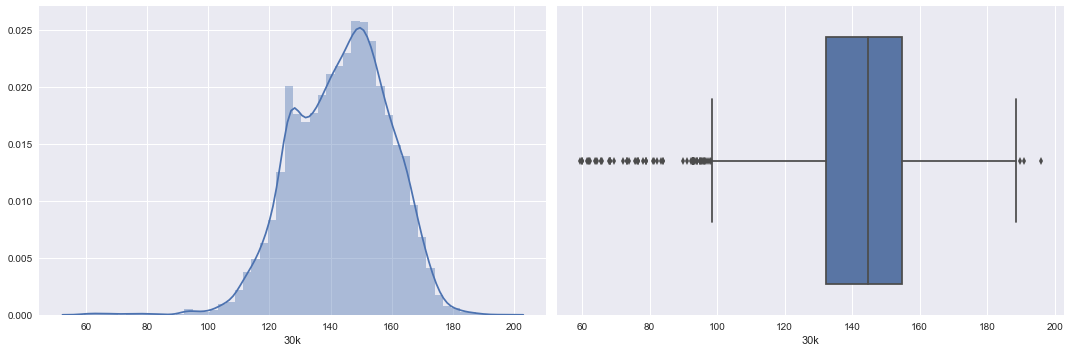

In [41]:
dist_plots('30k')

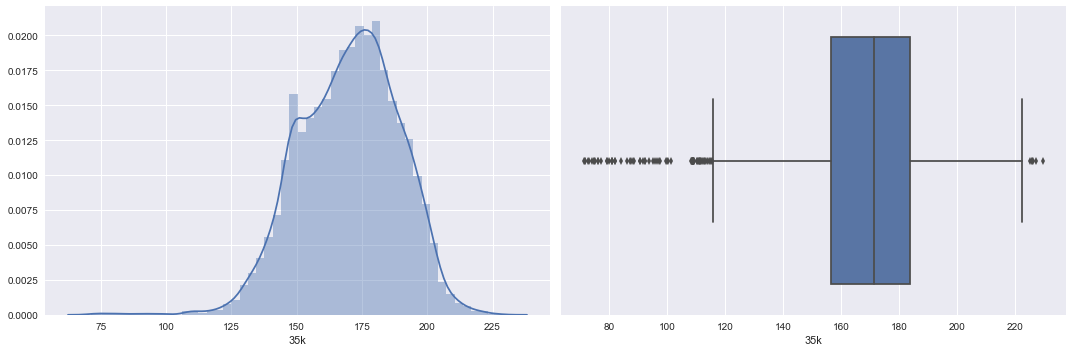

In [42]:
dist_plots('35k')

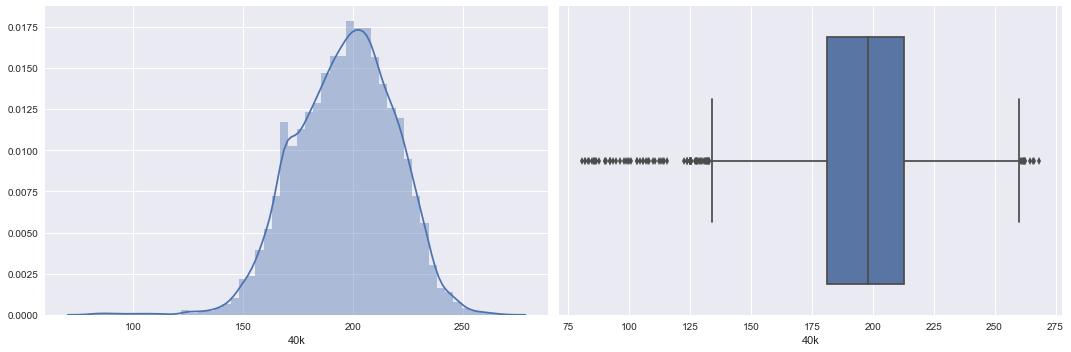

In [43]:
dist_plots('40k')

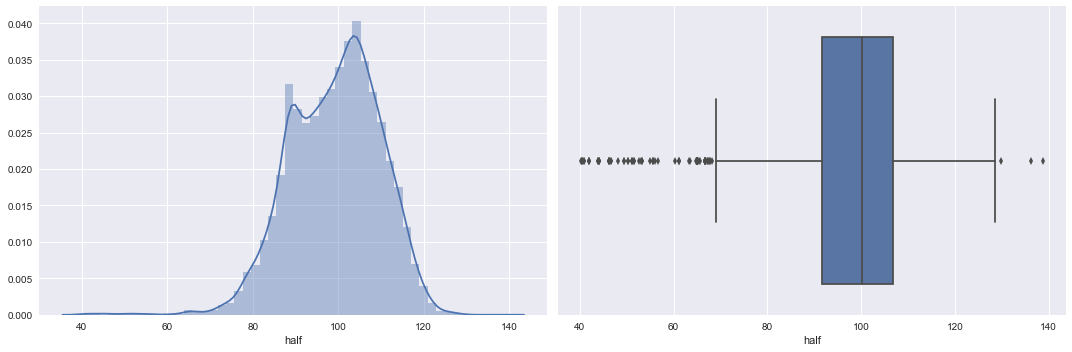

In [44]:
dist_plots('half')

In [47]:
df3.head()

,25k,age,division,10k,half,official,overall,pace,30k,5k,20k,35k,40k,male
0,49.87,28,9,18.18,40.93,90.90,9,3.47,62.07,8.90,38.80,74.73,85.55,1
1,77.27,30,5,30.90,64.90,132.50,5,5.07,92.97,15.90,61.52,108.78,124.77,1
2,77.23,23,1,30.90,64.92,130.37,1,4.98,92.72,15.93,61.53,108.68,123.78,1
3,50.50,32,5,18.73,42.00,88.43,5,3.38,61.35,8.98,39.88,73.00,83.43,1
4,48.75,39,3,18.18,40.57,87.22,3,3.33,59.92,8.92,38.55,71.68,81.88,1


In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [58]:
X = df3[['25k', 'age', 'division', '10k', 'half', 
         'official', 'pace', '30k', '5k', '20k', '35k', '40k', 'male']]

In [59]:
y = df3.overall

In [60]:
X_norm = normalize(X)

In [72]:
X_pca = PCA(2).fit_transform(X_norm)

In [75]:
y_pred = KMeans(n_clusters=25, random_state=42).fit_predict(X_pca)

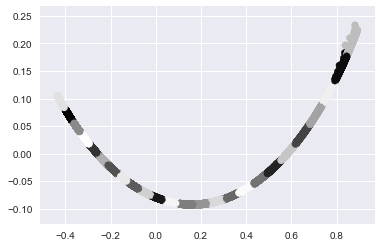

In [76]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()